# Notebook to plot EEL sections

*Add description of the project here*

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

#plt.style.use('dark_background')

%matplotlib inline


#### Variables

In [2]:
pathdir = '../data/raw/csv_ctdgrid'
colsec = 'royalblue'
colvec = 'salmon'
colellipse = 'limegreen'

## 1. Load and Prep. data

### 1.1 Load data into DataFrame

In [3]:
file4 = pathdir+'/'+'EELCTDandLADCP_3Dfield.csv'
dflad = pd.read_csv(file4,sep=',', index_col=None, 
                     header=0).drop(columns=['Vladcpalong'])


#### 1.1.1 Sort data format and variable name

In [4]:
dflad=dflad.round({'PMTP': 4, 'PSAL': 3, 'Sigma0': 3, 'Vrel': 3, 'Vladcp': 3, 'Vabs': 3})
dflad['Refdist']=dflad['Refdist'].apply(int)
dflad

,CruiseID,Year,Staname,Refdist,Depth,PTMP,PSAL,Sigma0,Vrel,Vladcp,Vabs
0,d22396,1996,14G,1180,25,13.111862,35.194,26.521,0.071,-0.013,0.055
1,d22396,1996,14G,1180,35,13.084566,35.192,26.525,0.070,0.006,0.055
2,d22396,1996,14G,1180,45,12.935832,35.184,26.547,0.071,0.011,0.055
3,d22396,1996,14G,1180,55,12.398809,35.189,26.655,0.070,0.031,0.054
4,d22396,1996,14G,1180,65,11.861810,35.195,26.764,0.064,0.067,0.048
...,...,...,...,...,...,...,...,...,...,...,...
57865,dy078,2017,IB22S,13,65,7.941110,35.064,27.333,-0.053,0.014,-0.005
57866,dy078,2017,IB22S,13,75,7.915402,35.068,27.340,-0.052,-0.021,-0.004
57867,dy078,2017,IB22S,13,85,7.891565,35.074,27.349,-0.052,-0.021,-0.004
57868,dy078,2017,IB22S,13,95,7.856688,35.077,27.356,-0.051,-0.034,-0.004


In [5]:
df3D = dflad.rename(columns={"Refdist": "refdist","Year": "year","Depth": "depth"}).set_index(['refdist','year','depth']).round(3).sort_values(['refdist','year','depth']).drop(columns=['CruiseID','Staname'])
df3D=df3D.rename(columns={"PTMP": "ptmp", "PSAL": "psal", "Sigma0": "sigma0"})
df3D

ptmp    psal  sigma0   Vrel  Vladcp   Vabs
refdist year depth                                             
13      2005 15     8.815  35.020  27.163 -0.005   0.107  0.065
             25     8.827  35.041  27.178 -0.000   0.101  0.070
             35     8.783  35.073  27.210  0.003   0.086  0.073
             45     8.736  35.080  27.222  0.006   0.068  0.076
             55     8.733  35.098  27.237  0.008   0.055  0.078
...                   ...     ...     ...    ...     ...    ...
1242    2017 75     9.571  35.155  27.146  0.011   0.130  0.140
             85     9.472  35.173  27.177  0.008   0.135  0.137
             95     9.465  35.221  27.215  0.005   0.129  0.134
             105    9.538  35.264  27.237  0.002   0.106  0.131
             115    9.532  35.273  27.245 -0.000   0.087  0.129

[57870 rows x 6 columns]

#### 1.1.2 Import additional metadata

In [6]:
# Location of EEL stations
file3 = pathdir+'/'+'EELCTDandLADCP_refpos.csv'
dfloc = pd.read_csv(file3,sep=',', index_col=None, 
                     header=0)
dfloc['Refdist'] = dfloc['Refdist'].round(decimals=1)

# Sorted according to distance:
dfs = dfloc.sort_values('Refdist', ascending=True)
print(dfs)

   Staname  Refdist  LonSta  LatSta  DepthSta
68   IB23S      0.0 -20.215  63.317       120
67   IB22S     13.4 -20.067  63.216       670
66   IB21S     25.4 -19.916  63.133      1030
65   IB20S     55.6 -19.551  62.917      1400
64   IB19S     84.0 -19.668  62.667      1670
..     ...      ...     ...     ...       ...
4       5G   1277.5  -6.600  56.733        80
3       4G   1286.6  -6.450  56.733       115
2       3G   1292.4  -6.367  56.708        70
1       2G   1298.2  -6.283  56.683        30
0       1G   1307.6  -6.133  56.667       190

[69 rows x 5 columns]


## 1.2 Convert 3D dataframe into Xarray DataSet

In [7]:
da0 = df3D.to_xarray()
print(da0)

<xarray.Dataset>
Dimensions:  (depth: 269, refdist: 59, year: 15)
Coordinates:
  * refdist  (refdist) int64 13 25 55 84 122 160 ... 1180 1191 1222 1232 1242
  * year     (year) int64 1996 1997 1998 1999 2000 ... 2013 2014 2015 2016 2017
  * depth    (depth) int64 5 15 25 35 45 55 65 ... 2635 2645 2655 2665 2675 2685
Data variables:
    ptmp     (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    psal     (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    sigma0   (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vrel     (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vladcp   (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vabs     (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan


#### 1.2.1 Add additional Variables from metadatafile (Lat,Lon, Station Name, Cruise ID)

In [8]:
# Get position metadata

dfloc = pd.read_csv(pathdir+'/'+'EELCTDandLADCP_refpos.csv',sep=',', index_col=None, 
                     header=0)
# Make sure the station name are sorted by their distance along the section
sdfloc = dfloc.rename(columns={"Refdist": "refdist"}).sort_values('refdist', ascending=True)
sdfloc['refdist']=sdfloc['refdist'].apply(int)
sdfloc=sdfloc.set_index('refdist')

daloc = sdfloc.to_xarray()
print(daloc)

<xarray.Dataset>
Dimensions:   (refdist: 69)
Coordinates:
  * refdist   (refdist) int64 0 13 25 55 84 122 ... 1277 1286 1292 1298 1307
Data variables:
    Staname   (refdist) object 'IB23S' 'IB22S' 'IB21S' ... '3G' '2G' '1G'
    LonSta    (refdist) float64 -20.21 -20.07 -19.92 ... -6.367 -6.283 -6.133
    LatSta    (refdist) float64 63.32 63.22 63.13 62.92 ... 56.71 56.68 56.67
    DepthSta  (refdist) int64 120 670 1030 1400 1670 1790 ... 80 115 70 30 190


In [9]:
# Get cruise (time) metadata
dfdate = pd.read_csv(pathdir+'/'+'EELCTDandLADCP_refdate.csv',sep=',', index_col=None, 
                     header=0).rename(columns={"Year": "year"}).set_index('year')
dadate = dfdate.to_xarray()
print(dadate)

<xarray.Dataset>
Dimensions:   (year: 17)
Coordinates:
  * year      (year) int64 1996 1997 1998 1999 2000 ... 2013 2014 2015 2016 2017
Data variables:
    CruiseID  (year) object 'd22396' 'd23097' 'd23398' ... 'dy052' 'dy078'
    Month     (year) int64 10 9 5 9 2 2 10 10 8 6 5 5 5 7 6 6 5


#### 1.2.2 Merge metadata into main Dataset 

In [10]:
da=xr.merge([da0, daloc,dadate])
print(da)

<xarray.Dataset>
Dimensions:   (depth: 269, refdist: 69, year: 17)
Coordinates:
  * refdist   (refdist) int64 0 13 25 55 84 122 ... 1277 1286 1292 1298 1307
  * year      (year) int64 1996 1997 1998 1999 2000 ... 2013 2014 2015 2016 2017
  * depth     (depth) int64 5 15 25 35 45 55 ... 2635 2645 2655 2665 2675 2685
Data variables:
    ptmp      (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    psal      (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    sigma0    (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vrel      (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vladcp    (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vabs      (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Staname   (refdist) object 'IB23S' 'IB22S' 'IB21S' ... '3G' '2G' '1G'
    LonSta    (refdist) float64 -20.21 -20.07 -19.92 ... -6.367 -6.283 -6.133
    LatSta    (refdist) float

#### 1.2.3 Move variables into coordinates

In [11]:
da.coords['lon'] = ('refdist', da.LonSta)
da.coords['lat'] = ('refdist', da.LatSta)
da.coords['Staname'] = ('refdist', da.Staname)
da = da.drop(['LonSta','LatSta'])
print(da)

<xarray.Dataset>
Dimensions:   (depth: 269, refdist: 69, year: 17)
Coordinates:
  * refdist   (refdist) int64 0 13 25 55 84 122 ... 1277 1286 1292 1298 1307
  * year      (year) int64 1996 1997 1998 1999 2000 ... 2013 2014 2015 2016 2017
  * depth     (depth) int64 5 15 25 35 45 55 ... 2635 2645 2655 2665 2675 2685
    Staname   (refdist) object 'IB23S' 'IB22S' 'IB21S' ... '3G' '2G' '1G'
    lon       (refdist) float64 -20.21 -20.07 -19.92 ... -6.367 -6.283 -6.133
    lat       (refdist) float64 63.32 63.22 63.13 62.92 ... 56.71 56.68 56.67
Data variables:
    ptmp      (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    psal      (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    sigma0    (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vrel      (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vladcp    (refdist, year, depth) float64 nan nan nan nan ... nan nan nan nan
    Vabs      (refdist, year, de

#### 1.2.4 Visual inspection of the data

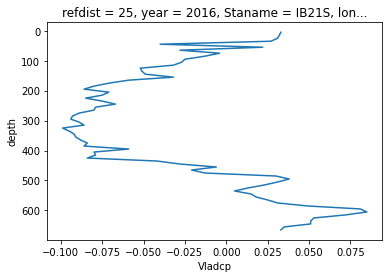

In [12]:
da.Vladcp[2,-2,:].plot(y='depth', yincrease=False)


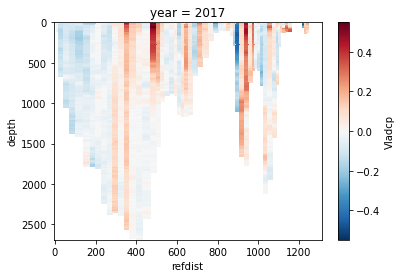

In [13]:
da.Vladcp.sel(year=2017).plot(y='depth', yincrease=False)

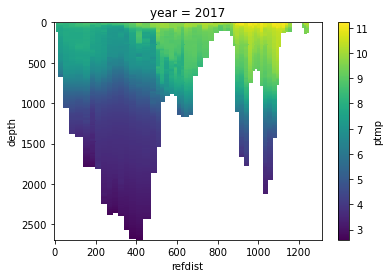

In [14]:
da.ptmp.sel(year=2017).plot(y='depth', yincrease=False)

\
Plot evolution of Velocity profile at station E

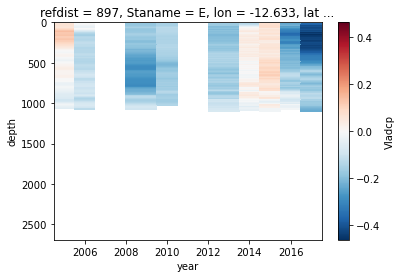

In [15]:
# Extra Refdist value associated with Station E and F
staE = da.refdist.values[da.Staname.values=='E'][0]
staF = da.refdist.values[da.Staname.values=='F'][0]

# Plot 
da.Vladcp.sel(refdist=staE,year=slice('2004','2017')).plot(y='depth', yincrease=False)

In [16]:
Vladcpmean = da.Vladcp.mean('year')
Vladcpstd = da.Vladcp.std(dim='year')

/Users/locupe/opt/anaconda3/envs/analysis_eel_data/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


\
Plot with data with min and max values

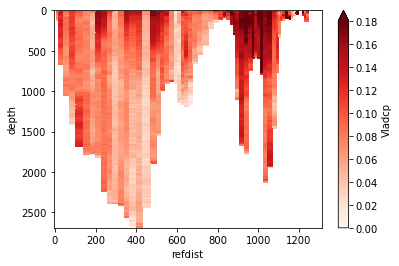

In [17]:
Vladcpstd.plot(y='depth', yincrease=False, vmin=0, vmax=0.18, cmap=plt.cm.Reds)

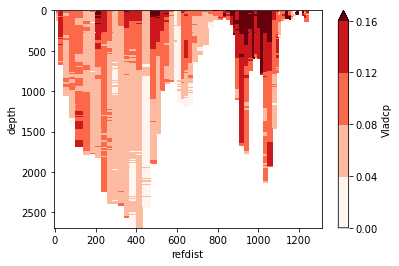

In [18]:
Vladcpstd.plot(y='depth', yincrease=False, levels=np.arange(0, 0.18, 0.04), cmap=plt.cm.Reds)

## 2. Contour plot

Create list of namedtuples for variable to plot on the figure with several subpanels:
The rows of the figure correspond to variable (Temperature, Salinity, Density, Velocity) while the columns correspond to the mean and standard deviation


In [19]:
import collections
fields = [
    'xarray_var',
    'short_name',
    'var_type',
    'contourf_lvls',
    'contour_lvls',    
    'cmap',
    'long_name',
    'cbar_title',
    ]
Datatoplot = collections.namedtuple('Datatoplot',fields,defaults=(None,) * len(fields))

In [20]:
Datatoplot?

Init signature:
Datatoplot(
    xarray_var=None,
    short_name=None,
    var_type=None,
    contourf_lvls=None,
    contour_lvls=None,
    cmap=None,
    long_name=None,
    cbar_title=None,
)
Docstring:      Datatoplot(xarray_var, short_name, var_type, contourf_lvls, contour_lvls, cmap, long_name, cbar_title)
Type:           type
Subclasses:     


##### Definitions of the list of variables to plot with plotting options

In [21]:

ptmp_mean = Datatoplot(xarray_var='ptmp', short_name='Mean Pot. Temp.', var_type='mean', 
                      contourf_lvls= np.arange(3, 11, 1),cmap='plasma', 
                      long_name = 'Mean Potential Temperature', cbar_title ='$^\circ$C')

ptmp_std = Datatoplot(xarray_var='ptmp', short_name='Std Pot. Temp.', var_type='std', 
                      contourf_lvls= np.arange(0, 1.2, 0.2),cmap='OrRd', 
                      long_name = 'Std Potential Temperature', cbar_title ='$^\circ$C')

psal_mean = Datatoplot(xarray_var='psal', short_name='Mean Sal.', var_type='mean', 
                      contourf_lvls= np.arange(34.9, 35.45, 0.05), cmap='viridis', 
                      long_name = 'Mean Salinity', cbar_title =' ')

psal_std = Datatoplot(xarray_var='psal', short_name='Std Sal.', var_type='std', 
                      contourf_lvls= np.arange(0, 0.12, 0.02),cmap='OrRd', 
                      long_name = 'Std Salinity', cbar_title =' ')

sigma0_mean = Datatoplot(xarray_var='sigma0', short_name='Mean Pot. Dens. Ano.', var_type='mean', 
                      contourf_lvls= np.arange(27.2, 27.9, 0.1), cmap='cividis_r', 
                      long_name = 'Mean Potential Density Anomaly', cbar_title ='kg.m$^{-3}$')

sigma0_std = Datatoplot(xarray_var='sigma0', short_name='Std Pot. Dens. Ano.', var_type='std', 
                      contourf_lvls= np.arange(0, 0.12, 0.02),cmap='OrRd', 
                      long_name = 'Std Potential Density Anomaly', cbar_title ='kg.m$^{-3}$')

ladcp_mean = Datatoplot(xarray_var='Vladcp', short_name='Mean LADCP Vel.', var_type='mean', 
                      contourf_lvls= np.arange(-16, 20, 4)/100, cmap='coolwarm', 
                      long_name = 'Mean cross-section velocity from LADCP', cbar_title ='m.s$^{-1}$')

ladcp_std = Datatoplot(xarray_var='Vladcp', short_name='Std LADCP Vel.', var_type='std', 
                      contourf_lvls= np.arange(0, 18, 4)/100, cmap='OrRd', 
                      long_name = 'Std cross-section velocity from LADCP', cbar_title ='m.s$^{-1}$')

# Create a list of namedtuples
varstoplot=((ptmp_mean,ptmp_std),
              (psal_mean,psal_std),
              (sigma0_mean,sigma0_std),
              (ladcp_mean,ladcp_std),            
           )

Definition of a class to display a "pretty" formatting of the namedtuples (from [stackoverflow post](https://stackoverflow.com/a/43823671/13890678)):

In [22]:
from io import StringIO
import pprint

class MyPrettyPrinter(pprint.PrettyPrinter):
    def format_namedtuple(self, object, stream, indent, allowance, context, level):
        # Code almost equal to _format_dict, see pprint code
        write = stream.write
        write(object.__class__.__name__ + '(')
        object_dict = object._asdict()
        length = len(object_dict)
        if length:
            # We first try to print inline, and if it is too large then we print it on multiple lines
            inline_stream = StringIO()
            self.format_namedtuple_items(object_dict.items(), inline_stream, indent, allowance + 1, context, level, inline=True)
            max_width = self._width - indent - allowance
            if len(inline_stream.getvalue()) > max_width:
                self.format_namedtuple_items(object_dict.items(), stream, indent, allowance + 1, context, level, inline=False)
            else:
                stream.write(inline_stream.getvalue())
        write(')')

    def format_namedtuple_items(self, items, stream, indent, allowance, context, level, inline=False):
        # Code almost equal to _format_dict_items, see pprint code
        indent += self._indent_per_level
        write = stream.write
        last_index = len(items) - 1
        if inline:
            delimnl = ', '
        else:
            delimnl = ',\n' + ' ' * indent
            write('\n' + ' ' * indent)
        for i, (key, ent) in enumerate(items):
            last = i == last_index
            write(key + '=')
            self._format(ent, stream, indent + len(key) + 2,
                         allowance if last else 1,
                         context, level)
            if not last:
                write(delimnl)

    def _format(self, object, stream, indent, allowance, context, level):
        # We dynamically add the types of our namedtuple and namedtuple like 
        # classes to the _dispatch object of pprint that maps classes to
        # formatting methods
        # We use a simple criteria (_asdict method) that allows us to use the
        # same formatting on other classes but a more precise one is possible
        if hasattr(object, '_asdict') and type(object).__repr__ not in self._dispatch:
            self._dispatch[type(object).__repr__] = MyPrettyPrinter.format_namedtuple
        super()._format(object, stream, indent, allowance, context, level)

In [23]:
pp = MyPrettyPrinter(indent=2, depth=4)
pp.pprint(varstoplot)

( ( Datatoplot(
      xarray_var='ptmp',
      short_name='Mean Pot. Temp.',
      var_type='mean',
      contourf_lvls=array([ 3,  4,  5,  6,  7,  8,  9, 10]),
      contour_lvls=None,
      cmap='plasma',
      long_name='Mean Potential Temperature',
      cbar_title='$^\\circ$C'),
    Datatoplot(
      xarray_var='ptmp',
      short_name='Std Pot. Temp.',
      var_type='std',
      contourf_lvls=array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
      contour_lvls=None,
      cmap='OrRd',
      long_name='Std Potential Temperature',
      cbar_title='$^\\circ$C')),
  ( Datatoplot(
      xarray_var='psal',
      short_name='Mean Sal.',
      var_type='mean',
      contourf_lvls=array([34.9 , 34.95, 35.  , 35.05, 35.1 , 35.15, 35.2 , 35.25, 35.3 ,
       35.35, 35.4 , 35.45]),
      contour_lvls=None,
      cmap='viridis',
      long_name='Mean Salinity',
      cbar_title=' '),
    Datatoplot(
      xarray_var='psal',
      short_name='Std Sal.',
      var_type='std',
      contourf_lvls=array([

### 2.1 with matplotlib

/Users/locupe/opt/anaconda3/envs/analysis_eel_data/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/locupe/opt/anaconda3/envs/analysis_eel_data/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/locupe/opt/anaconda3/envs/analysis_eel_data/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/locupe/opt/anaconda3/envs/analysis_eel_data/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


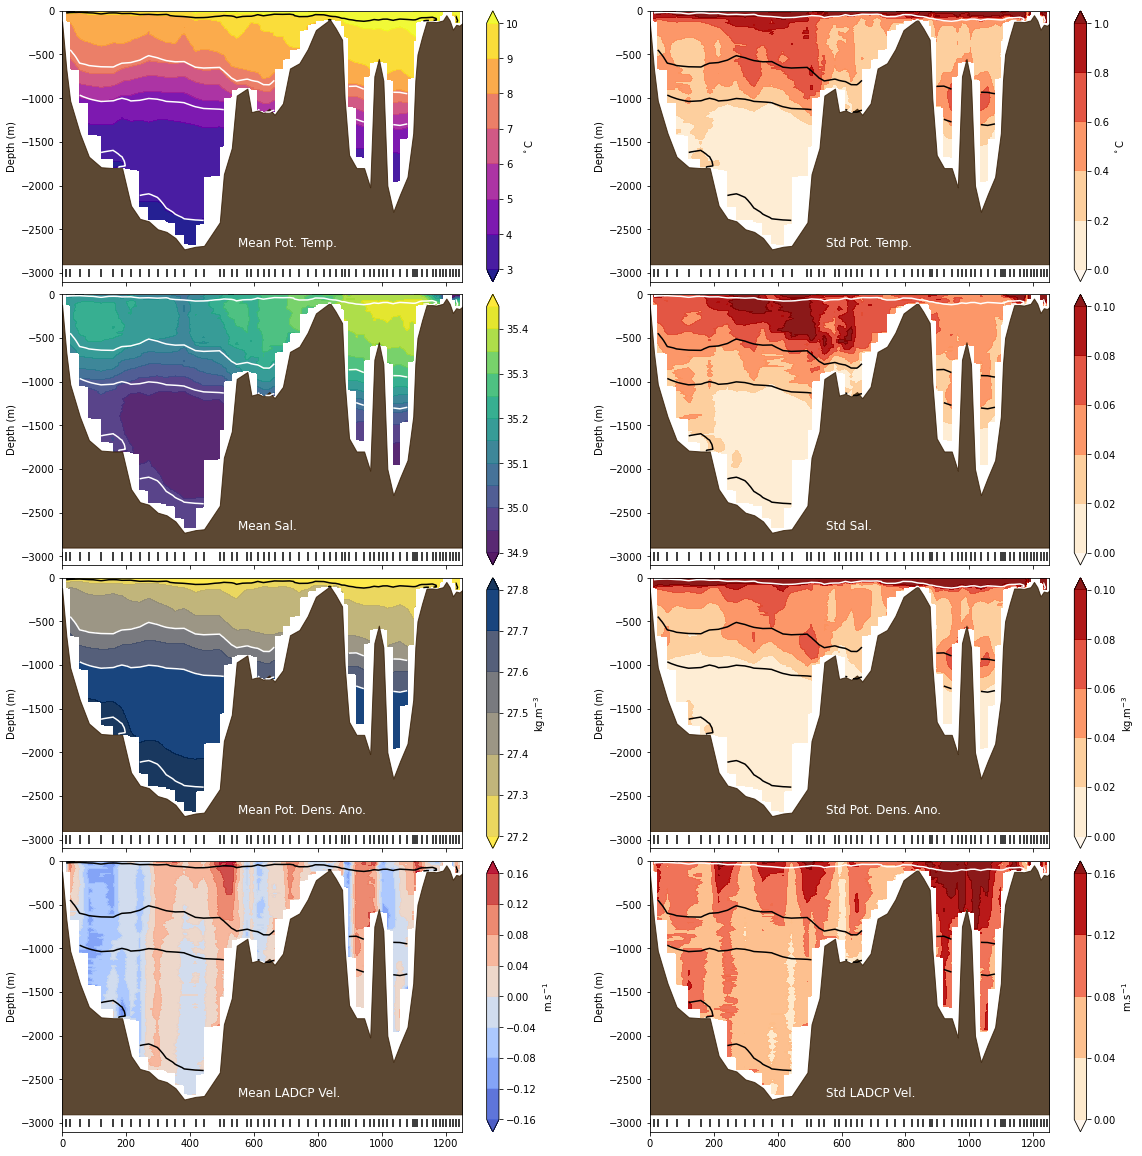

In [24]:
#plt.rcParams.update({'font.size': 10})
    
# Create the figure
## fig, axs = plt.subplots(4, 2, figsize=(12, 12), constrained_layout=True)
fig, axs = plt.subplots(4, 2, sharex=True, figsize=(16, 16))

for row in [0,1,2,3]:
    for col in [0,1]:

            data = varstoplot[row][col]
            if data.var_type == 'mean':
                var = da[data.xarray_var].mean('year')
            elif data.var_type == 'std':
                var = da[data.xarray_var].std('year')   
            else:
                raise ValueError(f"wrong var_type in {data}")

            cf_levels = data.contourf_lvls
            colmap = getattr(plt.cm, data.cmap)
    #         if VarDir['cmap'] == 'cividis':
    #             colmap = colmap[:-1,:]

            pltitle = data.long_name
            plunits = data.cbar_title

            X=da.refdist.values
            Y=da.depth.values
            Z=var.values
            Xi,Yi = np.meshgrid(X, Y, indexing='ij')

            ax = axs[row, col]
    #        ax = axs[col]

            CS = ax.contourf(Xi, -Yi, Z, cf_levels, alpha=0.9, cmap=colmap, extend='both');

            if data.contour_lvls is not None:
                CS2 = ax.contour(CS, levels=data.contour_lvls, colors='k')

            # Plot specific potential density contour indicating of different water masses
            # adapt the line colors according to background colormap
            c_WM = [27.20,27.50,27.70,27.85]
            if data.var_type == 'mean':
                CS_WM = ax.contour(Xi, -Yi, da['sigma0'].mean('year'), levels=c_WM, colors='w' )
                CS_WM.collections[0].set_color('k')               
                if data.xarray_var == 'psal':
                    CS_WM.collections[0].set_color('w')
                elif data.xarray_var == 'Vladcp':
                    for c in CS_WM.collections:
                        c.set_color('k')          
                        
            elif data.var_type == 'std':
                CS_WM = ax.contour(Xi, -Yi, da['sigma0'].mean('year'), levels=c_WM, colors='k' )                       
                CS_WM.collections[0].set_color('w')
                
            ax.set_ylabel('Depth (m)')
            ax.set_xlim([0,1250]) 
            ax.set_ylim([-3100,0])    

            # ax.set_title(pltitle)
            ax.text(550, -2700, data.short_name, fontsize=12, color ='white' )

            # Make a colorbar for the ContourSet returned by the contourf call.
            cbar = fig.colorbar(CS, ax=ax)
            cbar.ax.set_ylabel(plunits)
            #cbar.ax.set_ylabel('m/s')

            # Add the contour line levels to the colorbar
            if data.contour_lvls is not None:   
                cbar.add_lines(CS2)

            # Add bathymetry (from the nominal depth of the reference EEL stations)
            ax.fill_between(dfs['Refdist'], -dfs['DepthSta'], -2900, color="#331a00", alpha=0.8)

            ax.vlines(dfs['Refdist'], -3050, -2950, colors='k')

            
plt.tight_layout(pad=0.5,w_pad=3)          

plt.savefig('figures/02_' + 'figure4x2.pdf')      